In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
datagen.fit(x_train)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model():
    model = models.Sequential()

    # Input Layer + Conv Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Conv Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Flattening Layer
    model.add(layers.Flatten())

    # Fully Connected Layer
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Create the model
model = create_cnn_model()
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 890,410 (3.40 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

**Input Layer:** Flattening the 32x32x3 images for a fully connected layer setup. Converting the image into a 1D array.

**Hidden Layers:** Two fully connected layers:
* 512 and 256 neurons: Large layers help capture complex patterns.
* ReLU activation is chosen because it helps solve the vanishing gradient problem.

**Output Layer:** 10 neurons with Softmax activation to get class probabilities.

**Activation Functions:**

**ReLU (Rectified Linear Unit):**

Chosen for hidden layers as it is computationally efficient and avoids the vanishing gradient problem by setting all negative values to zero.
In backpropagation, ReLU helps by preserving gradients, especially in deeper networks, which makes learning faster.

**Tanh:**

Could also be used for hidden layers because it outputs values between -1 and 1, which is more useful for centered distributions.

Unlike sigmoid, tanh avoids saturation and is often better for hidden layers in networks with smaller datasets or fewer layers.

**Role in Backpropagation:**

* Activation functions are critical for introducing non-linearity, enabling the network to learn complex mappings.
* During backpropagation, they impact how gradients are propagated through the network.
* ReLU makes backpropagation more efficient because its gradient is 1 for positive inputs and 0 for negative inputs.

**Loss Function and Optimizer**

**Loss Functions:**

**Categorical Cross-Entropy:** The standard for multi-class classification problems, as it measures the difference between the predicted probability distribution and the true distribution (one-hot encoded labels).

**Mean Squared Error (MSE):** Less common in classification, but still a valid loss function. It computes the average of the squared differences between predicted probabilities and true labels.

**Hinge Loss:** Commonly used for "maximum-margin" classification, particularly in support vector machines (SVM), but can be adapted to neural networks.

**Optimizer:**

**Adam (Adaptive Moment Estimation):**
* Chosen because it combines the benefits of both RMSprop and SGD with momentum, making it efficient and robust.
* It adjusts learning rates adaptively, which helps optimize complex models faster.

**Impact of Learning Rate:**
* The learning rate controls the step size during optimization. If too large, the model may fail to converge or oscillate. If too small, convergence will be very slow.
* If the model is not converging, you can reduce the learning rate to ensure smaller steps in the gradient descent process, allowing finer adjustments to the weights.

**Training the Model**

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=25, validation_data=(x_test, y_test))

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.2873 - loss: 1.9046 - val_accuracy: 0.5069 - val_loss: 1.3739
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.4934 - loss: 1.3969 - val_accuracy: 0.5895 - val_loss: 1.1585
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.5512 - loss: 1.2603 - val_accuracy: 0.6065 - val_loss: 1.1090
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.5904 - loss: 1.1618 - val_accuracy: 0.6449 - val_loss: 0.9964
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6094 - loss: 1.0955 - val_accuracy: 0.6842 - val_loss: 0.9022
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6337 - loss: 1.0375 - val_accuracy: 0.7058 - val_loss: 0.8344
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6411 - loss: 1.0101 - val_accuracy: 0.7081 - val_loss: 0.8337
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6604 - loss: 0.9666 - val_accurac

**Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate model on test data
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)

# Generate classification report
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
print(confusion_matrix(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1000
           1       0.91      0.89      0.90      1000
           2       0.76      0.60      0.67      1000
           3       0.61      0.59      0.60      1000
           4       0.78      0.72      0.75      1000
           5       0.83      0.52      0.64      1000
           6       0.63      0.95      0.76      1000
           7       0.84      0.82      0.83      1000
           8       0.83      0.92      0.87      1000
           9       0.82      0.92      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000

[[812  15  29   7  11   0  13   5  71  37]
 [  8 892   0   1   0   0   6   2  20  71]
 [ 63   4 599  49  75  20 131  33  16  10]
 [ 21   8  45 589  37  60 160  20  30  30]
 [ 15   2  38  33 725   8 12

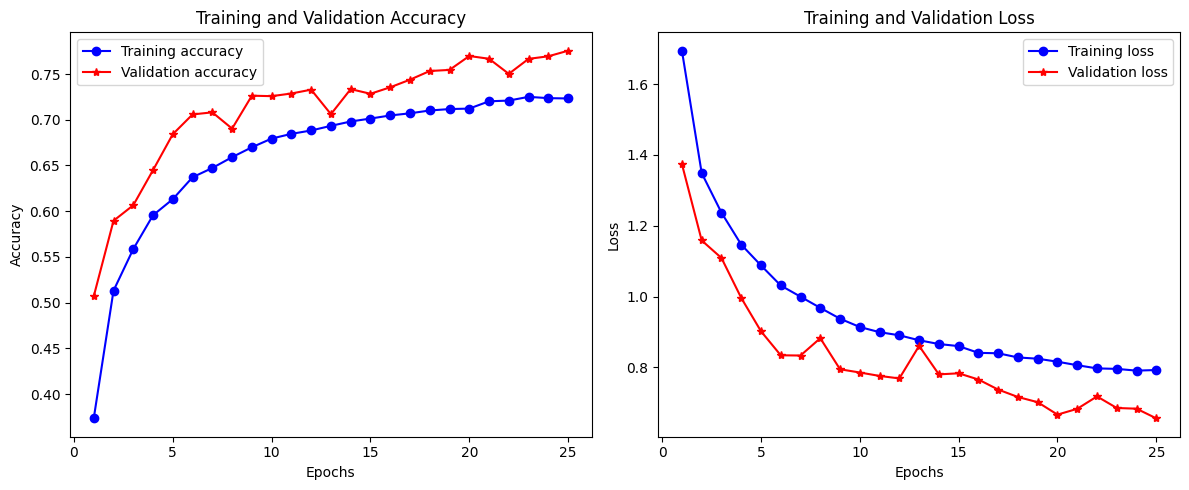

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
def plot_training_history(history):
    # Extracting the metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 5))

    # Subplot for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Subplot for loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Display the plots
    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


**Optimization Strategies**

**Early Stopping:** Monitor validation loss and stop training when it stops improving to prevent overfitting.

**Learning Rate Scheduling:** Gradually reduce the learning rate during training for smoother convergence.

**Weight Initialization:** Helps the model start training effectively. For instance, He initialization is good for ReLU activations as it keeps the gradients well-scaled.

**Why Weight Initialization Matters:**

* Poor weight initialization can cause vanishing or exploding gradients, which hampers convergence.
* Good initialization e.g., Xavier or He initialization ensures that the variance of the outputs of each layer remains consistent, leading to faster and more stable training.
